In [1]:
from flask_cors import CORS
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.metrics import recall_score, precision_score

In [3]:
data = pd.read_csv('god-class-2020+2019+2018.csv')
data = data[['WMCNAMM_type', 'LOC_type','is_god_class']]
data.head()

,WMCNAMM_type,LOC_type,is_god_class
0,328,1371,False
1,3,27,False
2,91,569,False
3,61,312,True
4,3,27,False


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['is_god_class'] = encoder.fit_transform(data['is_god_class'])

In [5]:
data

,WMCNAMM_type,LOC_type,is_god_class
0,328,1371,0
1,3,27,0
2,91,569,0
3,61,312,1
4,3,27,0
...,...,...,...
282,9,307,0
283,43,588,0
284,115,1341,0
285,100,1204,1


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [7]:
X = data[['WMCNAMM_type', 'LOC_type']]
y = data ['is_god_class']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [10]:
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(25, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,526 (17.68 KB)

 Trainable params: 4,526 (17.68 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:

# X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [14]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4247 - loss: 0.6971 - val_accuracy: 0.3913 - val_loss: 0.6680
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6338 - loss: 0.6616 - val_accuracy: 0.7826 - val_loss: 0.6446
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7412 - loss: 0.6177 - val_accuracy: 0.7826 - val_loss: 0.6262
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.6149 - val_accuracy: 0.7826 - val_loss: 0.6107
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.6122 - val_accuracy: 0.7826 - val_loss: 0.5978
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7968 - loss: 0.5828 - val_accuracy: 0.7826 - val_loss: 0.5857
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 0.6035 - val_accuracy: 0.7826 - val_loss: 0.5751
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8340 - loss: 0.5566 - val_accuracy: 0.7826 - val_loss: 0.5645
Epoch 9

In [15]:
training_loss, training_accuracy = model.evaluate(X_train_scaled, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8299 - loss: 0.4136
Training Loss: 0.43673190474510193
Training Accuracy: 0.8122270703315735


In [16]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4807 
Test Loss: 0.48766735196113586
Test Accuracy: 0.8103448152542114


In [17]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Recall: 0.45454545454545453
Precision: 0.375
F1 Score: 0.410958904109589


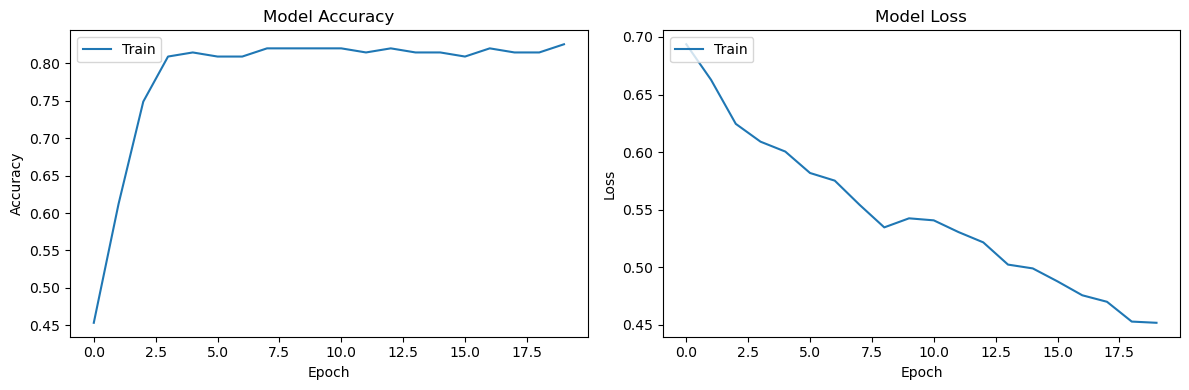

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [19]:
from keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from keras.optimizers import Adam


In [20]:
model = Sequential([
    Bidirectional(SimpleRNN(64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Bidirectional(SimpleRNN(32, activation='relu')),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 2, 128)         │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4510 - loss: 39.9988 - val_accuracy: 0.6087 - val_loss: 24.7943
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 19.1978 - val_accuracy: 0.6087 - val_loss: 30.3449
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5499 - loss: 21.7955 - val_accuracy: 0.6087 - val_loss: 15.5788
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4741 - loss: 17.8652 - val_accuracy: 0.6087 - val_loss: 7.8857
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5005 - loss: 13.9047 - val_accuracy: 0.6087 - val_loss: 9.7130
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5353 - loss: 12.4894 - val_accuracy: 0.6087 - val_loss: 11.5087
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6037 - loss: 12.2342 - val_accuracy: 0.6087 - val_loss: 11.8534
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5360 - loss: 12.3130 - val_accuracy: 0.6087 - val_loss: 6

In [23]:
training_loss, training_accuracy = model.evaluate(X_train, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5906 - loss: 1.4204
Training Loss: 1.493895411491394
Training Accuracy: 0.5807860493659973


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 0.9674 
Test Loss: 1.0679634809494019
Test Accuracy: 0.568965494632721


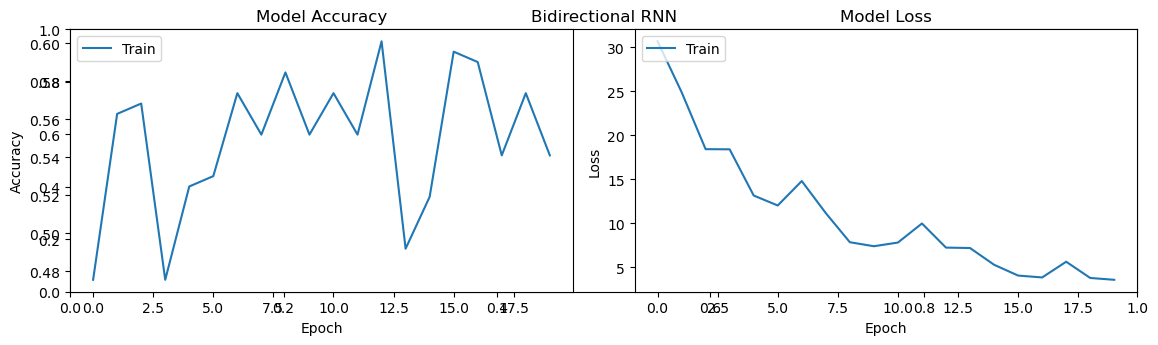

In [25]:
plt.figure(figsize=(12, 4))
plt.title('Bidirectional RNN')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Recall: 1.0
Precision: 0.5689655172413793
F1 Score: 0.7252747252747253


In [27]:
import joblib
from tensorflow.keras.models import save_model

# Save the model in Keras format
save_model(model, 'gc_modelRNN.keras')

# Save the scaler
joblib.dump(scaler, 'gc_scalarRNN.pkl')


['gc_scalarRNN.pkl']